## K-means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv")
df.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


### Calculating percentage of missing data in features 
**Ref: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe**

In [4]:
miss_total = df.isnull().sum().sort_values(ascending=False) # Finding and Sorting missing values in descending order
miss_percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
miss_df = pd.concat([miss_total,miss_percent],axis=1, keys = ['Missing_Total','Missing_Percent'])

In [5]:
miss_df.loc[miss_df['Missing_Total']>0] # features with missing data from dataset

,Missing_Total,Missing_Percent


In [6]:
null_val = df.isnull().sum()
null_val

x1    0
x2    0
x3    0
x4    0
dtype: int64

## No Missing Values

In [7]:
df.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


## Checking for duplicated data

In [8]:
df[df.duplicated()] 
# print("Duplicate Rows :")
# # Print the resultant Dataframe
# duplicate

,x1,x2,x3,x4


**No Duplicates in data.**
1. If there had been we should remove them

In [9]:
# df.drop_duplicates(subset="col_name", keep="first")

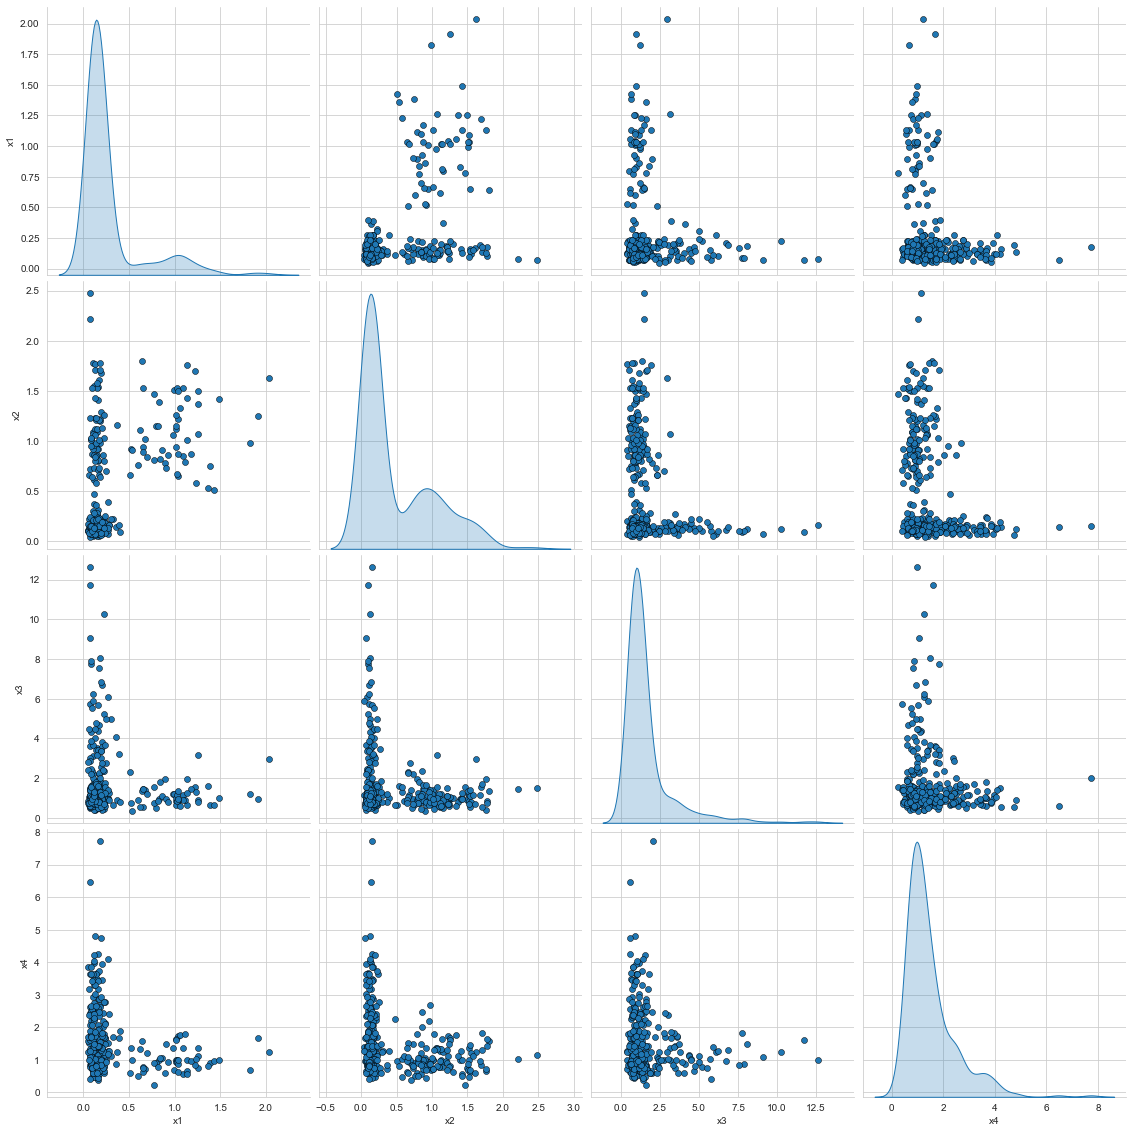

In [10]:
sns.set_style("whitegrid");
sns.pairplot(df, size=4, diag_kind = 'kde',plot_kws = {'edgecolor': 'k'});
plt.show()

**OBservation:**
1. Data is not Gaussian.
2. We have to use some power transformation to make it nearly gaussian

Density plot of features

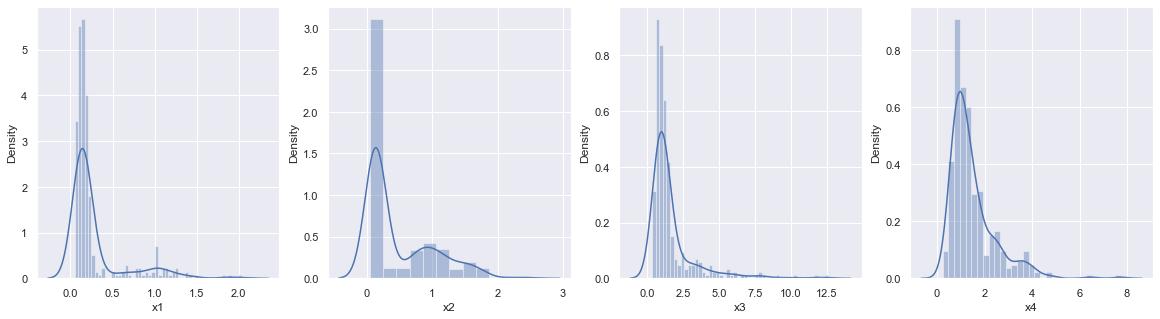

In [294]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
colors = []
# sns.set(font_scale = 1)
for i, column in enumerate(df.columns):
    sns.distplot(ax=axes[i],a = df[column])
# plt.show()

**Transforming the data using power Transformation**

In [11]:
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()
df_trns = pt1.fit_transform(df)
df_trns = pd.DataFrame(df_trns,columns=df.columns)

**Plotting transformed data**

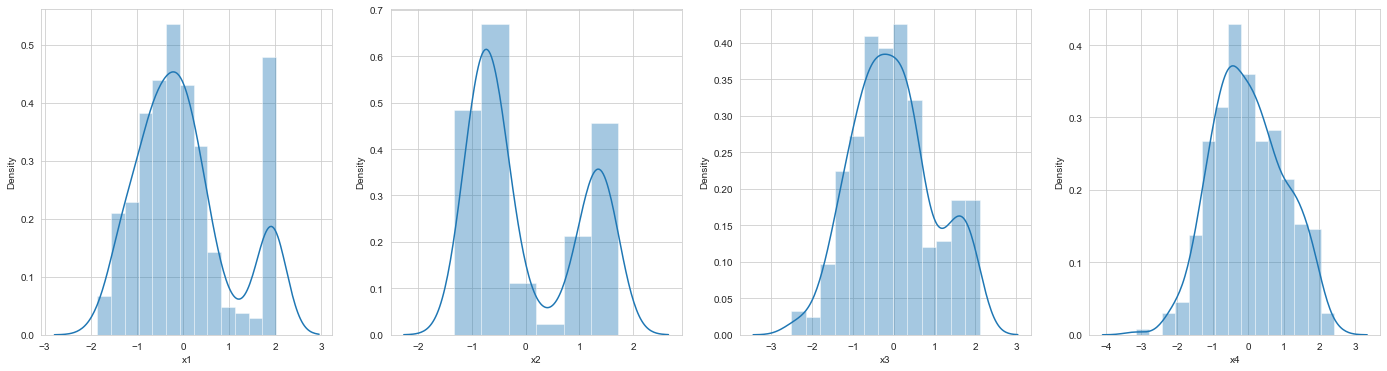

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(24,6))
for i, column in enumerate(df_trns.columns):
    sns.distplot(ax=axes[i],a = df_trns[column])

**Observation:**
1. Data is nearly gaussian now as comapred from raw data.
2. We will see some pair plot to observe how features related to each other.

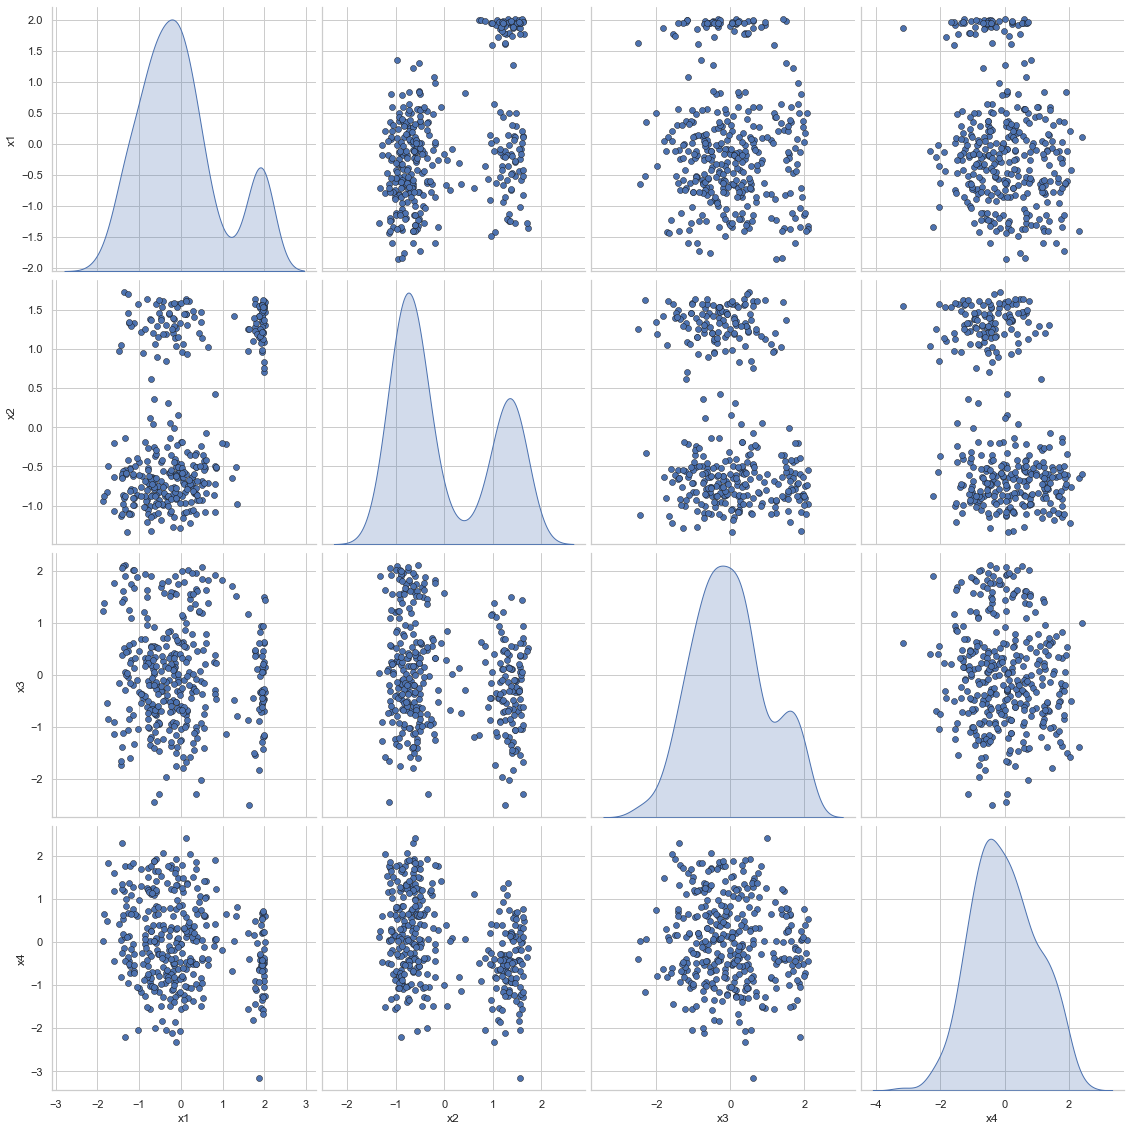

In [295]:
sns.set_style("whitegrid");
sns.pairplot(df_trns, size=4, diag_kind = 'kde',plot_kws = {'edgecolor': 'k'});
plt.show()

#### Standardizing Data before training

In [13]:
df_new = df_trns

In [14]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)

# statistics of scaled data
df_scaled.describe()

,x1,x2,x3,x4
count,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02
mean,3.479331e-17,-1.096187e-16,1.366428e-16,-1.192462e-16
std,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00
min,-1.857588e+00,-1.338705e+00,-2.506925e+00,-3.165714e+00
25%,-7.052257e-01,-8.219078e-01,-7.017952e-01,-7.222448e-01
50%,-1.551243e-01,-5.108609e-01,-9.255331e-02,-4.162625e-02
75%,4.149708e-01,1.201004e+00,5.851124e-01,6.684758e-01
max,2.018584e+00,1.727848e+00,2.108679e+00,2.414812e+00


**Next Steps**
1. The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.
2. We will see elbow method to find the optimum number of clusters  


https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

In [15]:
from sklearn.cluster import KMeans

In [16]:
def optimum_cluster(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title('The Elobw Method Graph')  
    plt.grid(True)
    plt.show()

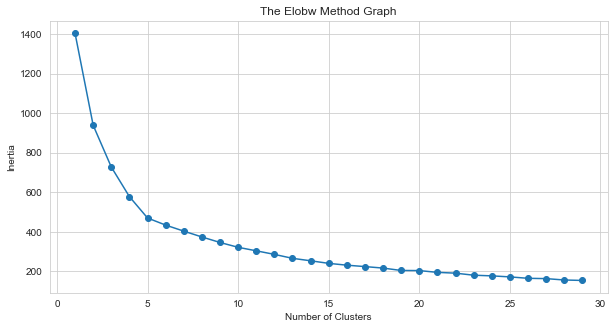

In [17]:
optimum_cluster(df_scaled, 30)

**Looking at the above elbow curve, we can choose any number of clusters between 5 to 8**

1. By the above plot, we can see that there is a kink at k=5.

2. Hence k=5 can be considered a good number of the cluster to cluster this data.


In [18]:
X = df_scaled

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score

**Using Shihoutte Metrics to qunatify accuracy**

In [20]:
opt_cluster = [5,6,7,8]
for i in opt_cluster:    
    clusterer = KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    # print(cluster_labels)
    X['cluster_'+str(i)] = cluster_labels
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For cluster =", i,
          "The average silhouette_score is :", silhouette_avg)

For cluster = 5 The average silhouette_score is : 0.45087766879131885
For cluster = 6 The average silhouette_score is : 0.5625274804487074
For cluster = 7 The average silhouette_score is : 0.6427905530259359
For cluster = 8 The average silhouette_score is : 0.6369954076516512


1. We can se that as we increase number of cluster we silhouette_score also increases.
2. But in cluster 8 silhouette_score is less than that of cluster 7 meaning negative values are present in cluster 8 while taking average. so we should reject cluster 8. 

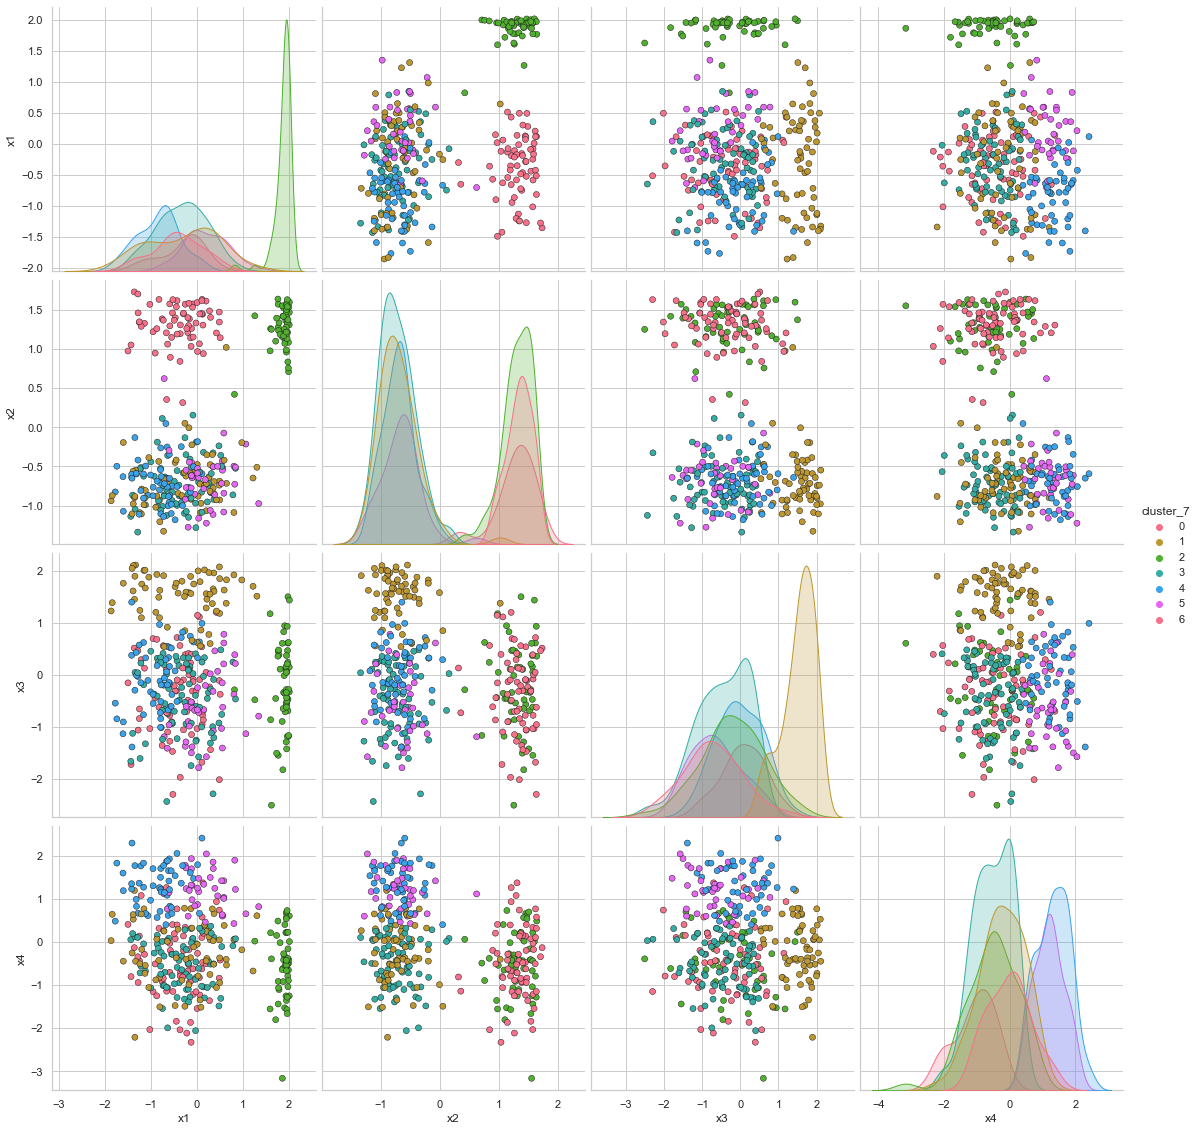

In [310]:
sns.set_style("whitegrid");
sns.pairplot(X, size=4, vars = X.columns[0:4], hue=X.columns[6], diag_kind = 'kde',plot_kws = {'edgecolor': 'k'},palette = "husl");
plt.show()

**visualize the t-sne embedding**

In [316]:
data = X.iloc[:,:4]

In [311]:
from sklearn.manifold import TSNE

In [319]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=0)
tsne_data = tsne.fit_transform(data)
tsne_df = pd.DataFrame(X.iloc[:,4],tsne_data)#,columns = df.columns)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.016s...
[t-SNE] Computed neighbors for 351 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.790690
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.577175
[t-SNE] KL divergence after 300 iterations: 0.434605


In [338]:
tsne_df = pd.DataFrame(tsne_data, columns=("Dimension-1","Dimension-2"))
tsne_df["label"] = X.iloc[:,4]

<AxesSubplot:xlabel='Dimension-1', ylabel='Dimension-2'>

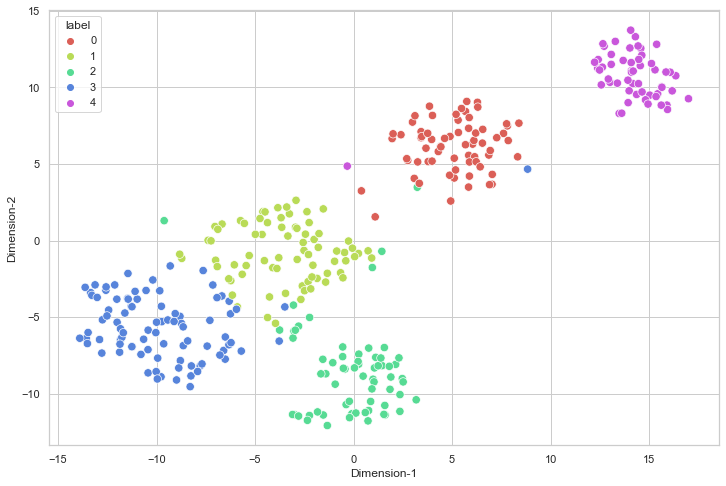

In [353]:
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.scatterplot(
    x="Dimension-1", y="Dimension-2",
    hue="label",
    palette=sns.color_palette("hls", 5),
    data=tsne_df,
    legend="full",
    alpha=1,
    s = 70
)

**Observation:**
1. This is already a significant improvement over the K-means visualisation we used earlier

**References:**
1. https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
2. https://towardsdatascience.com/t-distributed-stochastic-neighbor-embedding-t-sne-bb60ff109561
3. https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097